In [11]:
import sys
sys.path.append('../scripts')  
from models import *
from df_handling import * 
from text_embedding import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [12]:
#load training datasets training ta panta - testing tin vasi tis postgres
train1 = pd.read_csv('../data/fullfacts_emb.csv')
train2 = pd.read_csv('../data/greek_web_scraping_emb.csv')
train3 = pd.read_csv('../data/snopes2_emb.csv', nrows=1000)
train4 = pd.read_csv('../data/reuters_emb.csv')

train1 = unravel_df(train1, ['text_embedding'])
train2 = unravel_df(train2, ['text_embedding'])
train3 = unravel_df(train3, ['text_embedding'])
train4 = unravel_df(train4, ['text_embedding'])

In [13]:
train_df = pd.concat([train1,train2,train4], ignore_index=True)

In [14]:
train_df.shape

(2355, 4)

In [15]:
train_df.dropna(inplace=True)
train_df.reset_index(drop=True, inplace=True)


In [16]:
train_df.shape, 

((2354, 4),)

In [17]:
test_df = pd.read_csv('../data/postgres.csv')
test_df = unravel_df(test_df, ['text_embedding'])

In [18]:
train_df.shape, test_df.shape, 148/2354

((2354, 4), (148, 4), 0.06287170773152082)

In [19]:
X_train = [train_df.iloc[i,2] for i in range(len(train_df))]
y_train = np.array(train_df.label)
X_test = [test_df.iloc[i,2] for i in range(len(test_df))]
y_test = np.array(test_df.label)

In [20]:
if train_df['label'].isnull().any():
    print("Column 'column1' contains null values.")

In [21]:
if train1['label'].isnull().any():
    print("Column 'column1' contains null values.")



Column 'column1' contains null values.


In [22]:
if train2['label'].isnull().any():
    print("Column 'column1' contains null values.")

In [23]:
if train4['label'].isnull().any():
    print("Column 'column1' contains null values.")

In [24]:
train_df = train_df[train_df.label<=2]
train_df.label.value_counts()

0.0    1345
1.0     699
2.0     237
Name: label, dtype: int64

Model Accuracy: 0.399

Model Recall: 0.399

Model Precision: 0.397

Model F1-Score: 0.398

Cross validation score: [0.504 0.623 0.686 0.648 0.609 0.609 0.651 0.579 0.715 0.757]

Classification report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51        79
           1       0.32      0.33      0.32        52
           2       0.12      0.12      0.12        17

    accuracy                           0.40       148
   macro avg       0.32      0.32      0.32       148
weighted avg       0.40      0.40      0.40       148




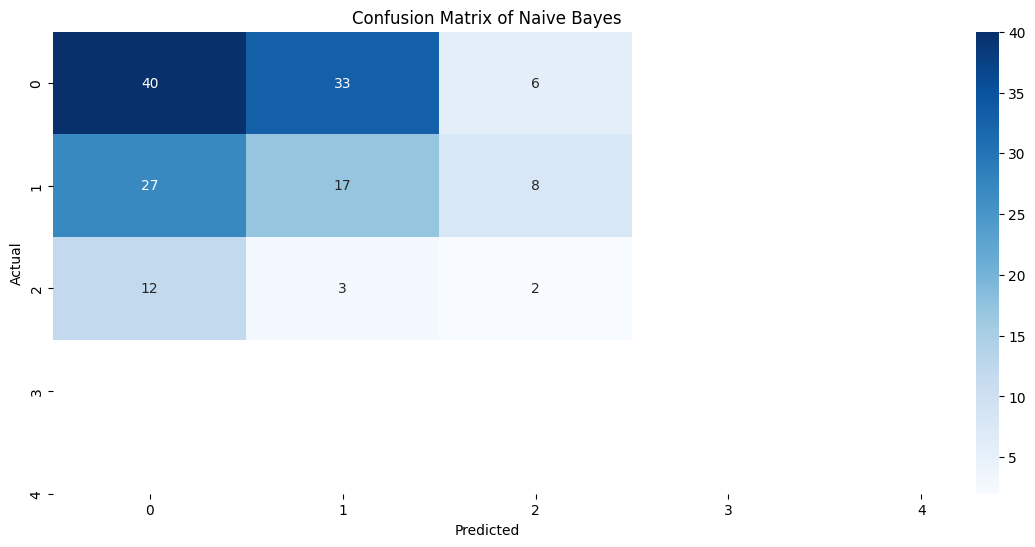

In [25]:
NaiveBayes(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.473

Model Recall: 0.473

Model Precision: 0.426

Model F1-Score: 0.446

Cross validation score: [0.801 0.856 0.869 0.843 0.86  0.855 0.864 0.864 0.847 0.847]

Classification report:
               precision    recall  f1-score   support

           0       0.53      0.53      0.53        79
           1       0.41      0.54      0.46        52
           2       0.00      0.00      0.00        17

    accuracy                           0.47       148
   macro avg       0.31      0.36      0.33       148
weighted avg       0.43      0.47      0.45       148




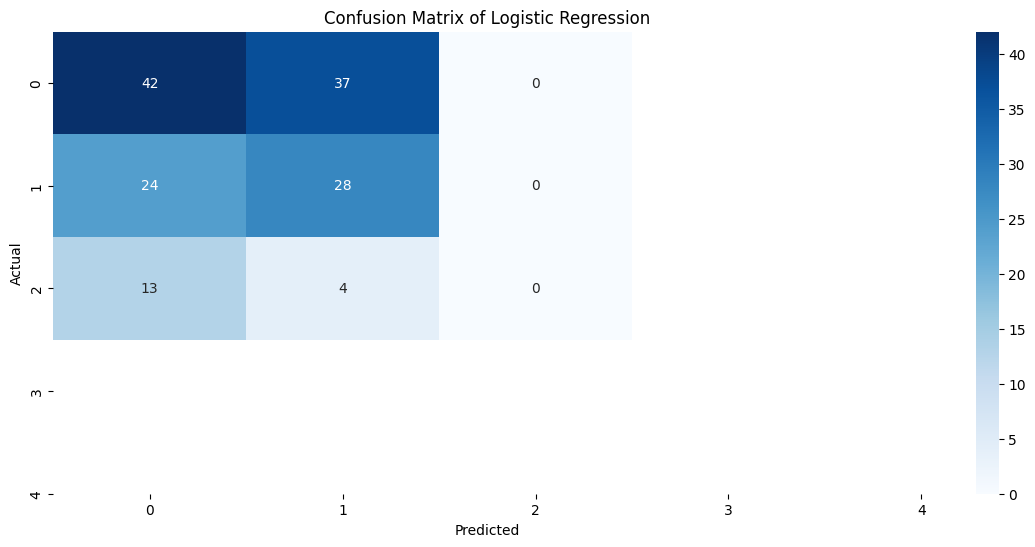

In [26]:
LogisticReg(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.459

Model Recall: 0.459

Model Precision: 0.425

Model F1-Score: 0.434

Cross validation score: [0.809 0.869 0.864 0.864 0.86  0.851 0.868 0.868 0.843 0.843]

Classification report:
               precision    recall  f1-score   support

           0       0.54      0.48      0.51        79
           1       0.38      0.58      0.46        52
           2       0.00      0.00      0.00        17

    accuracy                           0.46       148
   macro avg       0.31      0.35      0.32       148
weighted avg       0.42      0.46      0.43       148




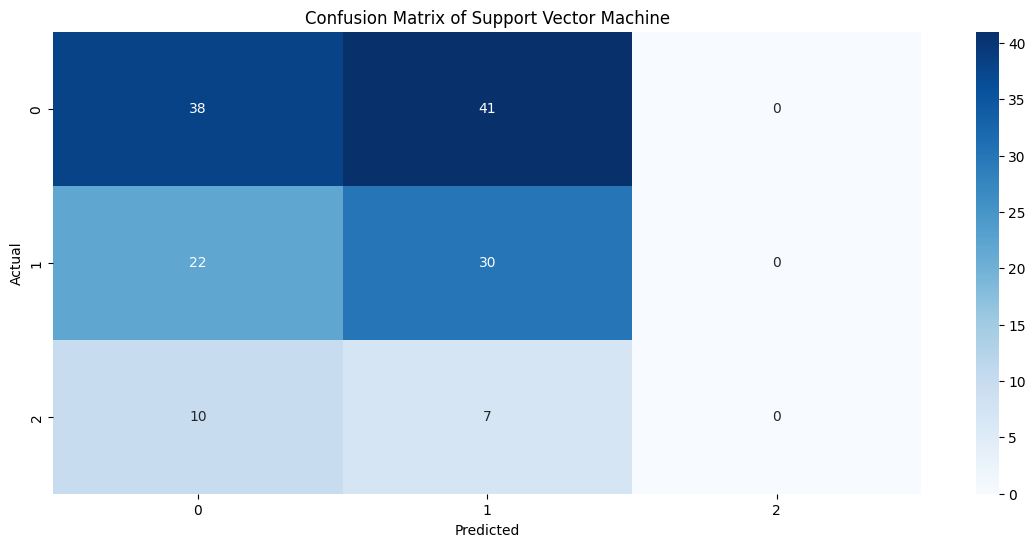

In [27]:
SVM(X_train, X_test, y_train, y_test)   

  File "c:\Users\johnk\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Model Accuracy: 0.486

Model Recall: 0.486

Model Precision: 0.525

Model F1-Score: 0.45

Cross validation score: [0.771 0.788 0.763 0.792 0.766 0.787 0.796 0.779 0.821 0.787]

Classification report:
               precision    recall  f1-score   support

           0       0.53      0.71      0.61        79
           1       0.36      0.29      0.32        52
           2       1.00      0.06      0.11        17

    accuracy                           0.49       148
   macro avg       0.63      0.35      0.35       148
weighted avg       0.53      0.49      0.45       148




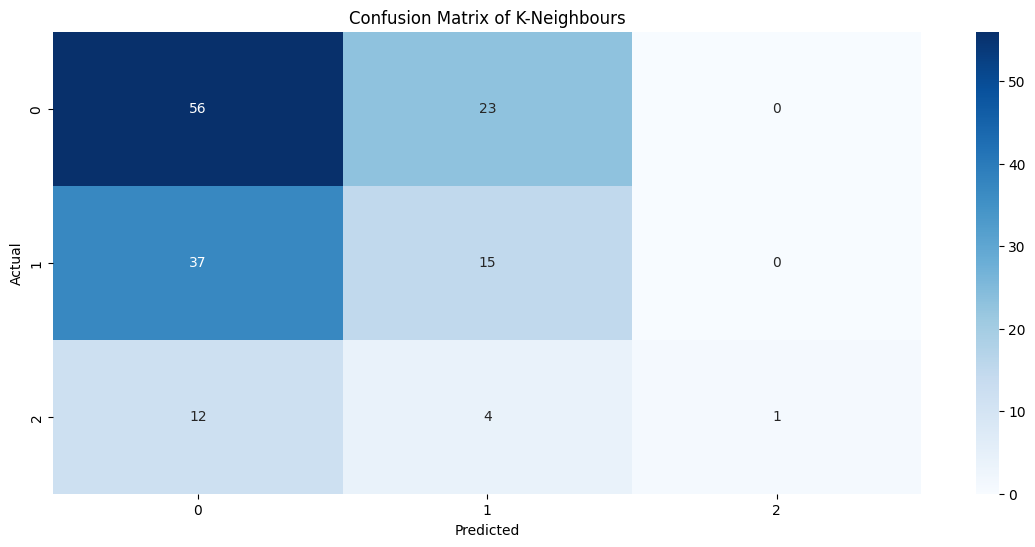

In [28]:
KNeigh(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.459

Model Recall: 0.459

Model Precision: 0.399

Model F1-Score: 0.426

Cross validation score: [0.792 0.835 0.843 0.814 0.834 0.843 0.86  0.838 0.843 0.843]

Classification report:
               precision    recall  f1-score   support

           0       0.51      0.63      0.56        79
           1       0.36      0.35      0.35        52
           2       0.00      0.00      0.00        17

    accuracy                           0.46       148
   macro avg       0.29      0.33      0.31       148
weighted avg       0.40      0.46      0.43       148




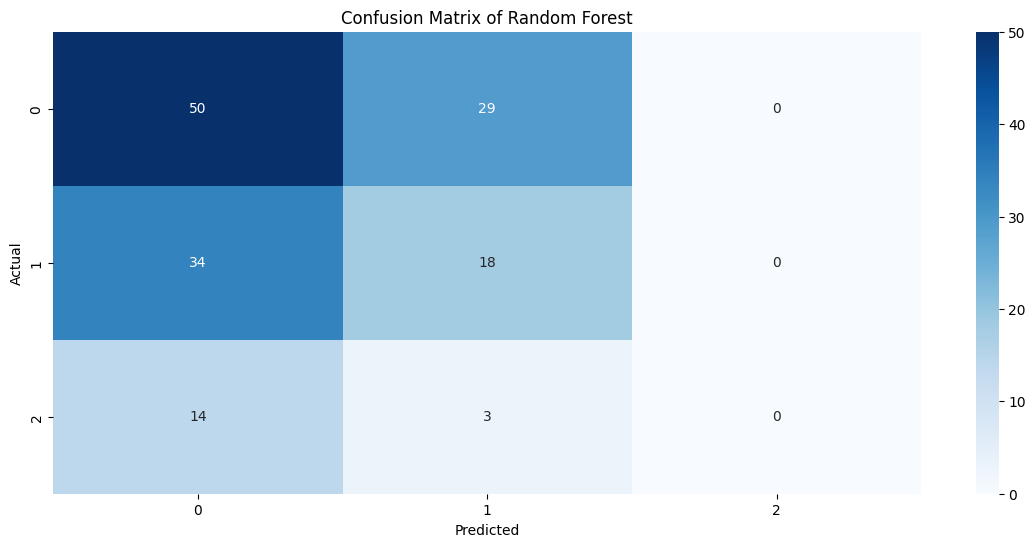

In [29]:
RandomForest(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.412

Model Recall: 0.412

Model Precision: 0.443

Model F1-Score: 0.418

Cross validation score: [0.669 0.597 0.619 0.682 0.638 0.677 0.617 0.677 0.634 0.621]

Classification report:
               precision    recall  f1-score   support

         0.0       0.53      0.38      0.44        79
         1.0       0.38      0.52      0.44        52
         2.0       0.25      0.24      0.24        17
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.41       148
   macro avg       0.23      0.23      0.22       148
weighted avg       0.44      0.41      0.42       148




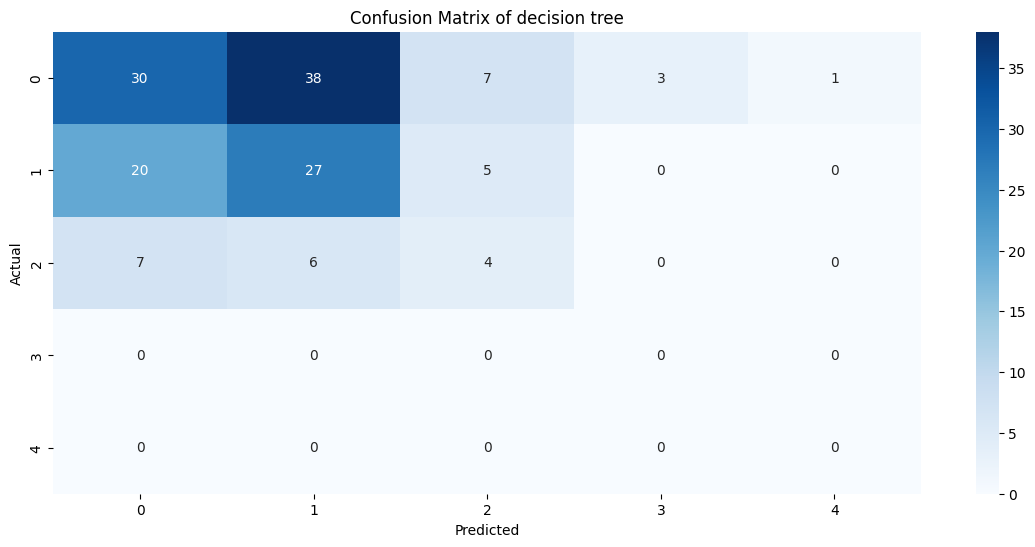

In [30]:
DecisionTree(X_train, X_test, y_train, y_test)   

Model Accuracy: 0.446

Model Recall: 0.446

Model Precision: 0.406

Model F1-Score: 0.422

Cross validation score: [0.72  0.814 0.805 0.818 0.766 0.74  0.813 0.783 0.809 0.817]

Classification report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50        79
           1       0.39      0.52      0.44        52
           2       0.00      0.00      0.00        17

    accuracy                           0.45       148
   macro avg       0.30      0.34      0.31       148
weighted avg       0.41      0.45      0.42       148




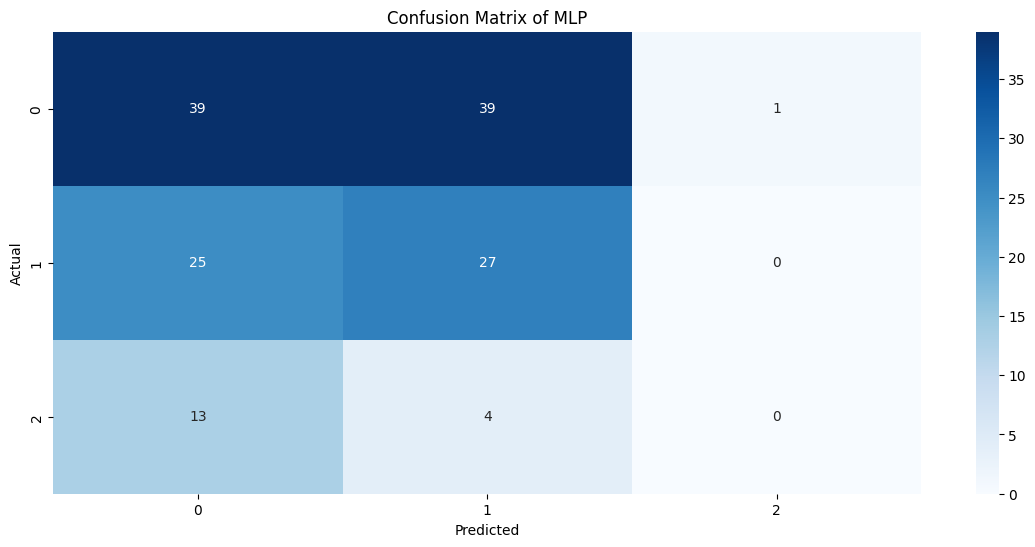

In [31]:
MLP(X_train, X_test, y_train, y_test)   